In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

import sys
sys.path.append('/mnt/disk1/yunseob/Pytorch/SSM/0_modules')
from SSM_utils import Reshape4torch, GenerateLabel
from SSM_DL_training import CNN_Training

# Load Data

In [2]:
data_dir = '/mnt/disk2/data/private_data/SSM/2_Mockup/1_AE_Accel_Data/2_NOISE_GN/-10db'

def GBdataLoad2(data_dir, phase = 'train', data = 'AE'):
    for i in os.listdir(data_dir):
        if 'good' in i and phase in i and data in i:
            G_X = np.load(os.path.join(data_dir, i))
        elif 'bad' in i and phase in i and data in i:
            B_X = np.load(os.path.join(data_dir, i))
            
    def add_ch(img):
        """
        (sample #, height, width,) -> (sample #, height, width, channel)
        """
        return np.expand_dims(img, axis = -1)
    
    G_X, B_X = add_ch(G_X), add_ch(B_X)
    G_X, B_X = Reshape4torch(G_X), Reshape4torch(B_X)

    return G_X, B_X

G_X, B_X = GBdataLoad2(data_dir, phase = 'train', data = 'accel')

G_Y, B_Y = GenerateLabel(G_X, 0), GenerateLabel(B_X, 1)

print('GOOD:', G_X.shape, 'BAD', B_X.shape)

GB_X = [G_X, B_X]
GB_Y = [G_Y, B_Y]

GOOD: (2822, 1, 40, 40) BAD (2510, 1, 40, 40)


0 (2822, 1, 40, 40) (2822,)
0 train: (2539, 1, 40, 40) (2539,) valid: (283, 1, 40, 40) (283,)
1 (2510, 1, 40, 40) (2510,)
1 train: (2259, 1, 40, 40) (2259,) valid: (251, 1, 40, 40) (251,)

Device: GeForce RTX 2080 Ti 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 40, 40]             640
            Conv2d-2           [-1, 64, 40, 40]          36,928
       BatchNorm2d-3           [-1, 64, 40, 40]             128
         MaxPool2d-4           [-1, 64, 20, 20]               0
            Conv2d-5           [-1, 64, 20, 20]          36,928
            Conv2d-6           [-1, 64, 20, 20]          36,928
       BatchNorm2d-7           [-1, 64, 20, 20]             128
         MaxPool2d-8           [-1, 64, 10, 10]               0
            Conv2d-9           [-1, 64, 10, 10]          36,928
           Conv2d-10           [-1, 64, 10, 10]          36,928
      BatchN

00740 | train_loss: 0.37922, train_accr: 0.840 | val_loss: 0.46118, val_accr: 0.760
00750 | train_loss: 0.34776, train_accr: 0.845 | val_loss: 0.48680, val_accr: 0.765
00760 | train_loss: 0.37384, train_accr: 0.845 | val_loss: 0.43519, val_accr: 0.785
00770 | train_loss: 0.34455, train_accr: 0.860 | val_loss: 0.45332, val_accr: 0.790
00780 | train_loss: 0.36015, train_accr: 0.845 | val_loss: 0.48427, val_accr: 0.765
00790 | train_loss: 0.35522, train_accr: 0.865 | val_loss: 0.46068, val_accr: 0.745
00800 | train_loss: 0.32711, train_accr: 0.890 | val_loss: 0.52369, val_accr: 0.735
00810 | train_loss: 0.31978, train_accr: 0.880 | val_loss: 0.48857, val_accr: 0.745
00820 | train_loss: 0.36185, train_accr: 0.860 | val_loss: 0.53874, val_accr: 0.680
00830 | train_loss: 0.35080, train_accr: 0.850 | val_loss: 0.50175, val_accr: 0.745
00840 | train_loss: 0.32444, train_accr: 0.855 | val_loss: 0.51705, val_accr: 0.720
00850 | train_loss: 0.26761, train_accr: 0.905 | val_loss: 0.45236, val_accr

01720 | train_loss: 0.03217, train_accr: 1.000 | val_loss: 0.80799, val_accr: 0.710
01730 | train_loss: 0.02462, train_accr: 1.000 | val_loss: 0.86573, val_accr: 0.740
01740 | train_loss: 0.02526, train_accr: 1.000 | val_loss: 0.74949, val_accr: 0.740
01750 | train_loss: 0.02286, train_accr: 1.000 | val_loss: 0.97837, val_accr: 0.685
01760 | train_loss: 0.03254, train_accr: 1.000 | val_loss: 0.92866, val_accr: 0.695
01770 | train_loss: 0.02527, train_accr: 1.000 | val_loss: 0.81682, val_accr: 0.730
01780 | train_loss: 0.03579, train_accr: 1.000 | val_loss: 0.68568, val_accr: 0.745
01790 | train_loss: 0.02736, train_accr: 1.000 | val_loss: 0.85476, val_accr: 0.690
01800 | train_loss: 0.01975, train_accr: 1.000 | val_loss: 0.79112, val_accr: 0.740
01810 | train_loss: 0.02498, train_accr: 1.000 | val_loss: 0.86517, val_accr: 0.730
01820 | train_loss: 0.01728, train_accr: 1.000 | val_loss: 0.94940, val_accr: 0.705
01830 | train_loss: 0.02254, train_accr: 1.000 | val_loss: 1.04903, val_accr

02700 | train_loss: 0.00514, train_accr: 1.000 | val_loss: 1.29939, val_accr: 0.690
02710 | train_loss: 0.00384, train_accr: 1.000 | val_loss: 1.13020, val_accr: 0.740
02720 | train_loss: 0.00331, train_accr: 1.000 | val_loss: 1.21103, val_accr: 0.695
02730 | train_loss: 0.00309, train_accr: 1.000 | val_loss: 1.20540, val_accr: 0.725
02740 | train_loss: 0.00300, train_accr: 1.000 | val_loss: 1.02804, val_accr: 0.765
02750 | train_loss: 0.00452, train_accr: 1.000 | val_loss: 1.39761, val_accr: 0.695
02760 | train_loss: 0.00298, train_accr: 1.000 | val_loss: 1.40161, val_accr: 0.665
02770 | train_loss: 0.00376, train_accr: 1.000 | val_loss: 1.09955, val_accr: 0.750
02780 | train_loss: 0.00480, train_accr: 1.000 | val_loss: 1.16342, val_accr: 0.700
02790 | train_loss: 0.00214, train_accr: 1.000 | val_loss: 1.43422, val_accr: 0.670
02800 | train_loss: 0.00325, train_accr: 1.000 | val_loss: 1.27946, val_accr: 0.690
02810 | train_loss: 0.00341, train_accr: 1.000 | val_loss: 1.11381, val_accr

03680 | train_loss: 0.00102, train_accr: 1.000 | val_loss: 1.36515, val_accr: 0.710
03690 | train_loss: 0.00105, train_accr: 1.000 | val_loss: 1.29225, val_accr: 0.705
03700 | train_loss: 0.00120, train_accr: 1.000 | val_loss: 1.63864, val_accr: 0.640
03710 | train_loss: 0.00092, train_accr: 1.000 | val_loss: 1.26096, val_accr: 0.730
03720 | train_loss: 0.00102, train_accr: 1.000 | val_loss: 1.64918, val_accr: 0.685
03730 | train_loss: 0.00100, train_accr: 1.000 | val_loss: 1.55612, val_accr: 0.685
03740 | train_loss: 0.00121, train_accr: 1.000 | val_loss: 1.34265, val_accr: 0.715
03750 | train_loss: 0.00093, train_accr: 1.000 | val_loss: 1.39883, val_accr: 0.705
03760 | train_loss: 0.00083, train_accr: 1.000 | val_loss: 1.63260, val_accr: 0.700
03770 | train_loss: 0.00090, train_accr: 1.000 | val_loss: 1.30644, val_accr: 0.720
03780 | train_loss: 0.00095, train_accr: 1.000 | val_loss: 1.37259, val_accr: 0.710
03790 | train_loss: 0.00090, train_accr: 1.000 | val_loss: 1.58568, val_accr

04660 | train_loss: 0.00033, train_accr: 1.000 | val_loss: 1.59258, val_accr: 0.730
04670 | train_loss: 0.00041, train_accr: 1.000 | val_loss: 1.52183, val_accr: 0.695
04680 | train_loss: 0.00041, train_accr: 1.000 | val_loss: 1.46878, val_accr: 0.725
04690 | train_loss: 0.00043, train_accr: 1.000 | val_loss: 1.29080, val_accr: 0.735
04700 | train_loss: 0.00053, train_accr: 1.000 | val_loss: 1.40482, val_accr: 0.715
04710 | train_loss: 0.00041, train_accr: 1.000 | val_loss: 1.80503, val_accr: 0.700
04720 | train_loss: 0.00043, train_accr: 1.000 | val_loss: 2.04281, val_accr: 0.660
04730 | train_loss: 0.00038, train_accr: 1.000 | val_loss: 1.55304, val_accr: 0.690
04740 | train_loss: 0.00036, train_accr: 1.000 | val_loss: 1.63011, val_accr: 0.690
04750 | train_loss: 0.00041, train_accr: 1.000 | val_loss: 1.61283, val_accr: 0.690
04760 | train_loss: 0.00054, train_accr: 1.000 | val_loss: 1.86167, val_accr: 0.685
04770 | train_loss: 0.00039, train_accr: 1.000 | val_loss: 1.77692, val_accr

/home/yunseob/Pytorch/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


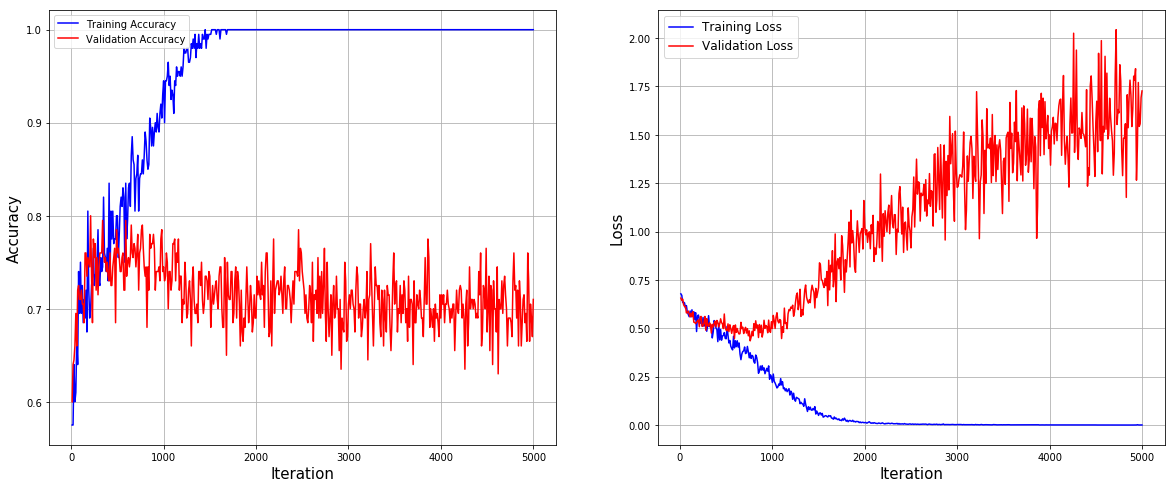

Best Model: GB_GN_-10dB_Accel_2004080347_00760_loss_0.366939_val_loss_0.461058.pt


In [3]:
CT = CNN_Training(GB_X, GB_Y, n_ch = 1, n_cls = 2, lr = 0.00001, n_batch_per_cls = 100, n_iter = 5000, model_name = 'GB_GN_-10dB_Accel', GPU_idx = 3)

CT.Run(model_dir = './model/', hist_dir = './results/0_train_hist/npy/')